In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
df = pd.read_csv("google.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20-08-2004,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,23-08-2004,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,24-08-2004,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,25-08-2004,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,26-08-2004,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4624 non-null   object 
 1   Open       4624 non-null   float64
 2   High       4624 non-null   float64
 3   Low        4624 non-null   float64
 4   Close      4624 non-null   float64
 5   Adj Close  4624 non-null   float64
 6   Volume     4624 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 253.0+ KB


In [58]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4.624000e+03
mean,37.675435,38.062752,37.288269,37.679692,37.679692,1.234169e+08
std,35.246229,35.633783,34.870722,35.251085,35.251085,1.530975e+08
min,2.470490,2.534002,2.464263,2.490913,2.490913,1.584340e+05
25%,12.606124,12.717893,12.423122,12.589436,12.589436,2.982900e+07
50%,24.931799,25.255511,24.722126,25.004821,25.004821,6.799686e+07
75%,53.809000,54.342374,53.163750,53.841751,53.841751,1.545712e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [59]:
df.shape

(4624, 7)

<IPython.core.display.Javascript object>


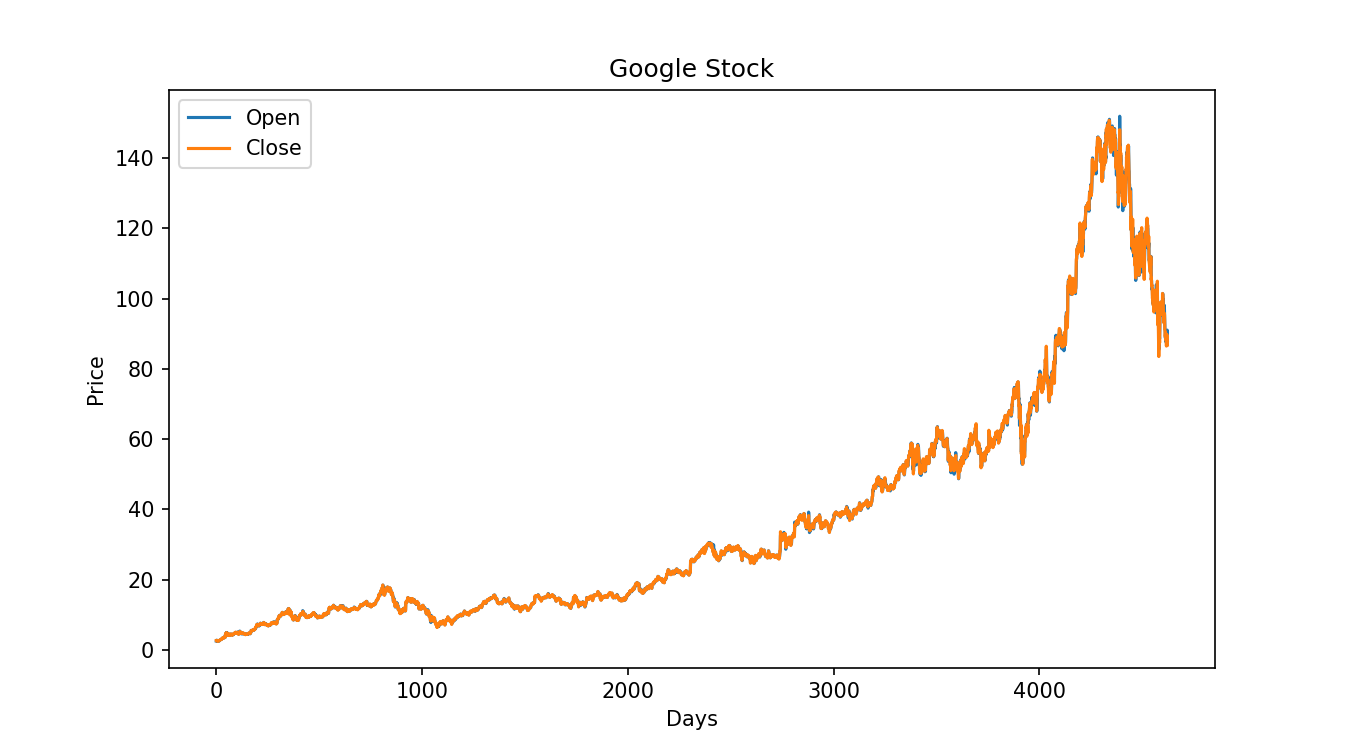

In [60]:
plt.figure(figsize=(9,5))
plt.title('Google Stock')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Open'], label ='Open')
plt.plot(df['Close'], label ='Close')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


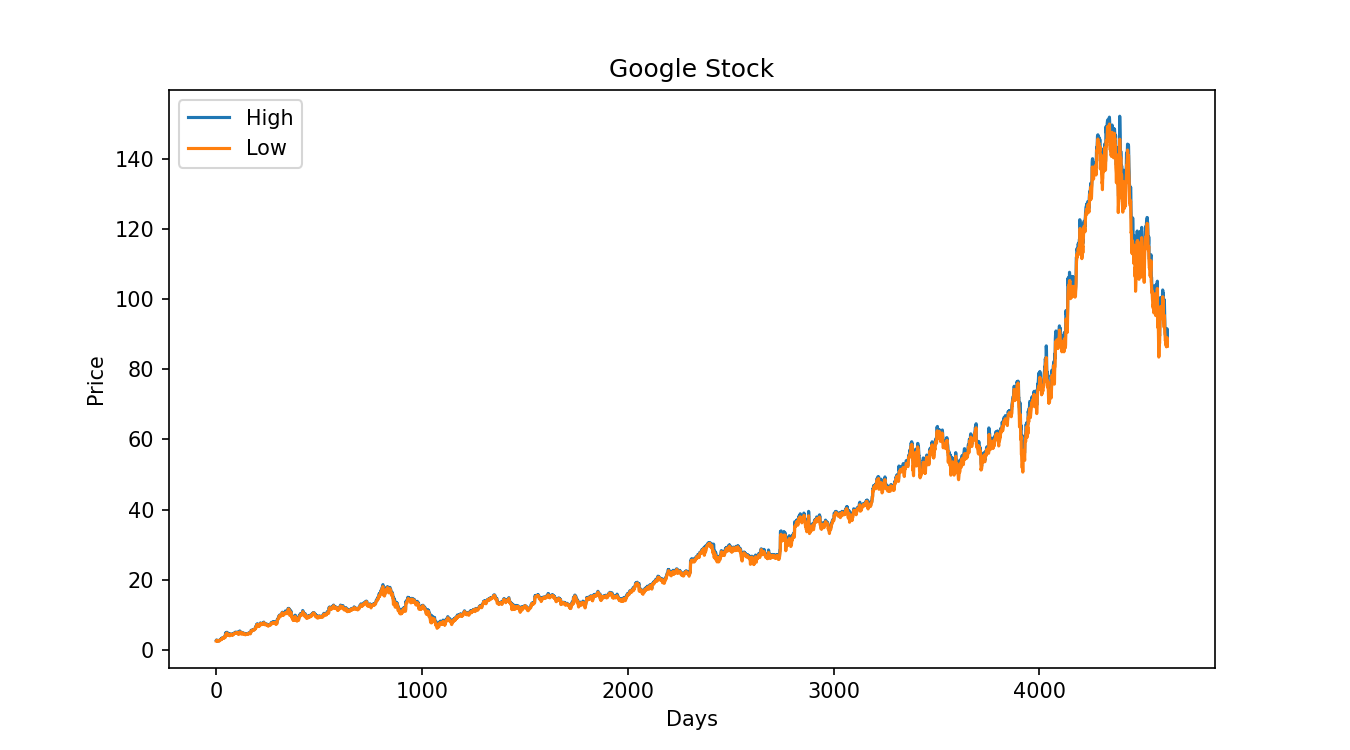

In [61]:
plt.figure(figsize=(9,5))
plt.title('Google Stock')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['High'], label ='High')
plt.plot(df['Low'], label ='Low')
plt.legend()
plt.show()

In [62]:
df2 = df['Close']
df2 = pd.DataFrame(df2)

In [63]:
future_days = 30
df2['Prediction'] = df2['Close'].shift(-future_days)

In [64]:
X = df2.drop(['Prediction'], 1)[:-future_days]
X = pd.DataFrame(X)
X.head(5)

C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_13664/687971443.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop(['Prediction'], 1)[:-future_days]


,Close
0,2.697639
1,2.724787
2,2.611960
3,2.640104
4,2.687676


In [65]:
y = df2['Prediction'][:-future_days]
y = pd.DataFrame(y)
y.head(5)

,Prediction
0,3.363891
1,3.446332
2,3.414203
3,3.458287
4,3.430392


In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [67]:
lr = LinearRegression().fit(x_train, y_train)

In [68]:
lr.score(x_test, y_test)

0.9844082638784181

In [69]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [[0.99759105]]
LR Intercept: 
 [0.67755887]


In [70]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = pd.DataFrame(x_future)
x_future.head()

C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_13664/1697924596.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


,Close
4564,98.050003
4565,98.300003
4566,99.709999
4567,97.180000
4568,100.779999


In [71]:
lr_prediction = lr.predict(x_future)

In [72]:
predictions = lr_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions
valid = valid.drop(['Prediction'], axis=1)
valid.head()

C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_13664/2214578107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
4594,97.330002,98.491365
4595,98.820000,98.740763
4596,97.599998,100.147362
4597,96.250000,97.623458
4598,95.440002,101.214784


<IPython.core.display.Javascript object>


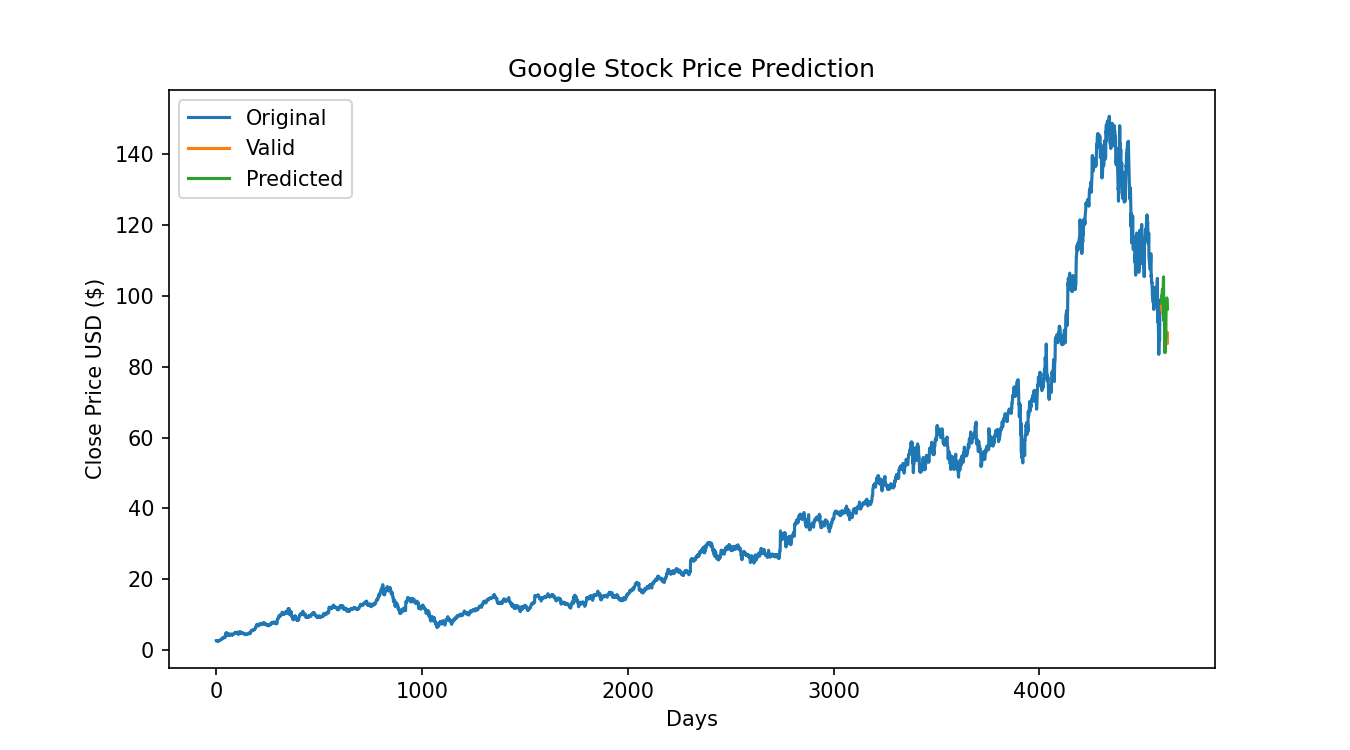

In [73]:
plt.figure(figsize=(9,5))
plt.title("Google Stock Price Prediction")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()